In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
alpha = np.linspace(-5,10, 30)
beta = np.linspace(-5,10, 30)

/tmp/ipykernel_13720/91506707.py:10: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_13720/91506707.py:11: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_13720/91506707.py:12: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


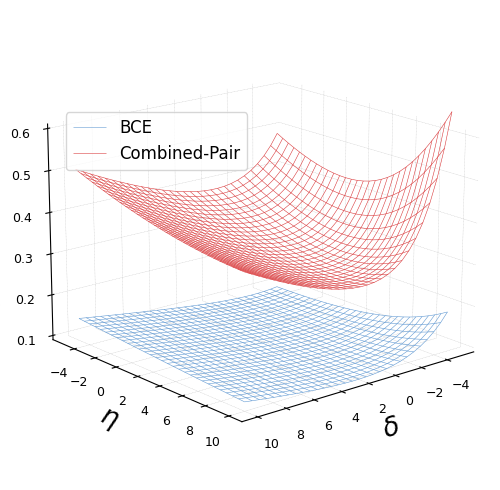

In [12]:
alpha_grid, beta_grid = np.meshgrid(alpha, beta)
pointwise_losses = np.load("./bce_loss.npy", allow_pickle=True)
combined_pair_losses = np.load("./combined_pair_loss.npy", allow_pickle=True)

# 创建图形和3D轴
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# 设置轴面颜色为透明
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# 绘制线框图
skip_cnt = 30
surface_bce = ax.plot_wireframe(alpha_grid, beta_grid, np.array(pointwise_losses).reshape(alpha_grid.shape), 
                                label='BCE', rcount=skip_cnt, ccount=skip_cnt, color='#5F98D2', linewidth=0.39)
surface_combined_pair = ax.plot_wireframe(alpha_grid, beta_grid, np.array(combined_pair_losses).reshape(alpha_grid.shape), 
                                          label='Combined-Pair', rcount=skip_cnt, ccount=skip_cnt, color='#D9383A', linewidth=0.39)

# 设置轴线和网格的样式
ax.xaxis._axinfo["grid"].update({"linewidth": 0.2, 'linestyle': "--"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.2, 'linestyle': "--"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.2, 'linestyle': "--"})

# 设置轴标签和标题
ax.set_xlabel(r'$\delta$', fontsize=19)
ax.set_ylabel(r'$\eta$', fontsize=19)
ax.set_zlabel(r"Loss Function Value $\mathcal{L}$")  # 增加标题的垂直间距
ax.set_zmargin(10)
# 设置其他参数
ax.set_zlim(0.1, 0.6)
ax.tick_params(axis='both', which='major', labelsize=9)
ax.legend(bbox_to_anchor=(0.5,0.8,),fontsize=12)
# plt.subplots_adjust(top=0.7) 
ax.grid(True, linestyle='dotted', linewidth=0.5, alpha=0.5)
ax.view_init(elev=17, azim=50)
plt.tight_layout()
plt.savefig('../../../../figure/surface_compare_crop.pdf',dpi=500,bbox_inches='tight')
# 显示图形
plt.show()